In [1]:
import os
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv("/kaggle/input/california-housing-prediction-problem/housing.csv")

In [3]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [4]:
from sklearn.model_selection import train_test_split 
X_train, X_test = train_test_split(df, test_size = 0.2, random_state = 42)

In [5]:
X_train.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND
17848,-121.86,37.42,20.0,5032.0,808.0,2695.0,801.0,6.6227,264800.0,<1H OCEAN
6252,-117.97,34.04,28.0,1686.0,417.0,1355.0,388.0,2.5192,157300.0,<1H OCEAN
9389,-122.53,37.91,37.0,2524.0,398.0,999.0,417.0,7.9892,500001.0,NEAR BAY
6113,-117.90,34.13,5.0,1126.0,316.0,819.0,311.0,1.5000,139800.0,<1H OCEAN
6061,-117.79,34.02,5.0,18690.0,2862.0,9427.0,2777.0,6.4266,315600.0,<1H OCEAN


In [6]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 14196 to 15795
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


In [7]:
X_train.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.582290,35.643149,28.608285,2642.004784,538.496851,1426.453004,499.986919,3.880754,207194.693738
std,2.005654,2.136665,12.602499,2174.646744,419.007096,1137.056380,380.967964,1.904294,115622.626448
min,-124.350000,32.550000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.810000,33.930000,18.000000,1454.000000,296.750000,789.000000,280.000000,2.566700,119800.000000
50%,-118.510000,34.260000,29.000000,2129.000000,437.000000,1167.000000,410.000000,3.545800,179850.000000
75%,-118.010000,37.720000,37.000000,3160.000000,647.000000,1726.000000,606.000000,4.773175,265125.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
X_train.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [9]:
X_train["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     7341
INLAND        5227
NEAR OCEAN    2086
NEAR BAY      1854
ISLAND           4
Name: count, dtype: int64

In [10]:
X_train.ocean_proximity.unique()

array(['NEAR OCEAN', 'INLAND', '<1H OCEAN', 'NEAR BAY', 'ISLAND'],
      dtype=object)

<Axes: xlabel='longitude', ylabel='latitude'>

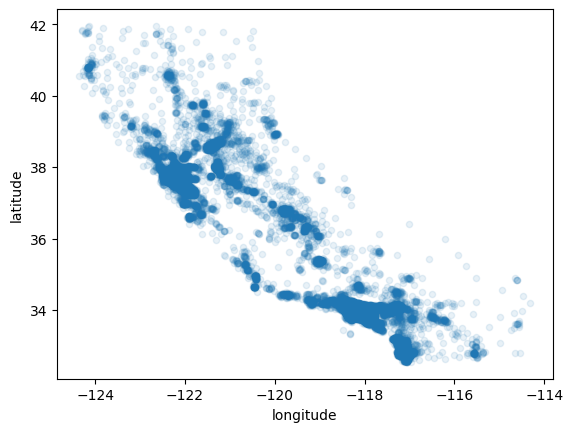

In [11]:
X_train.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.1)

In [12]:
X_train.median_house_value.mean()

207194.6937378876

In [13]:
X_corr = X_train.copy()
X_corr = X_corr.drop("ocean_proximity", axis = 1)
correlation = X_corr.corr()
correlation.median_house_value.sort_values(ascending = False)

median_house_value    1.000000
median_income         0.690647
total_rooms           0.133989
housing_median_age    0.103706
households            0.063714
total_bedrooms        0.047980
population           -0.026032
longitude            -0.046349
latitude             -0.142983
Name: median_house_value, dtype: float64

In [14]:
# New Features added and again corr matrix is calculated
X_train["bedroom_room"] = X_train["total_bedrooms"]/X_train["total_rooms"]
X_train["pop_house"] = X_train["population"]/ X_train["households"]
X_train["rooms_house"] = X_train["total_rooms"]/ X_train["households"]

In [15]:
X_test["bedroom_room"] = X_test["total_bedrooms"]/X_test["total_rooms"]
X_test["pop_house"] = X_test["population"]/ X_test["households"]
X_test["rooms_house"] = X_test["total_rooms"]/ X_test["households"]

In [16]:
X_train.info()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 14196 to 15795
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
 10  bedroom_room        16512 non-null  float64
 11  pop_house           16512 non-null  float64
 12  rooms_house         16512 non-null  float64
dtypes: float64(12), object(1)
memory usage: 1.8+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 4128 entries, 20046 to 3665
Data columns (total 13 columns)

In [17]:
X_test.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
bedroom_room          207
pop_house               0
rooms_house             0
dtype: int64

In [18]:
# Handling Missing Values
from sklearn.impute import SimpleImputer
impute = SimpleImputer(strategy = 'median')
X_train_num = X_train.drop("ocean_proximity", axis = 1)
X_train_imputed = impute.fit_transform(X_train_num)
X_train_num_imputed = pd.DataFrame(X_train_imputed, columns = X_train_num.columns, index = X_train_num.index)
X_train = pd.concat([X_train_num_imputed, X_train["ocean_proximity"]], axis = 1)

# On X_test
X_test_num = X_test.drop("ocean_proximity", axis = 1)
X_test_imputed = impute.fit_transform(X_test_num)
X_test_num_imputed = pd.DataFrame(X_test_imputed, columns = X_test_num.columns, index = X_test_num.index)
X_test = pd.concat([X_test_num_imputed, X_test["ocean_proximity"]], axis = 1)


In [19]:
print(X_test.info())
print(X_test.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 4128 entries, 20046 to 3665
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           4128 non-null   float64
 1   latitude            4128 non-null   float64
 2   housing_median_age  4128 non-null   float64
 3   total_rooms         4128 non-null   float64
 4   total_bedrooms      4128 non-null   float64
 5   population          4128 non-null   float64
 6   households          4128 non-null   float64
 7   median_income       4128 non-null   float64
 8   median_house_value  4128 non-null   float64
 9   bedroom_room        4128 non-null   float64
 10  pop_house           4128 non-null   float64
 11  rooms_house         4128 non-null   float64
 12  ocean_proximity     4128 non-null   object 
dtypes: float64(12), object(1)
memory usage: 451.5+ KB
None
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
tot

In [20]:
X_corr = X_train.copy().drop("ocean_proximity", axis = 1)

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 14196 to 15795
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   bedroom_room        16512 non-null  float64
 10  pop_house           16512 non-null  float64
 11  rooms_house         16512 non-null  float64
 12  ocean_proximity     16512 non-null  object 
dtypes: float64(12), object(1)
memory usage: 1.8+ MB


<Axes: >

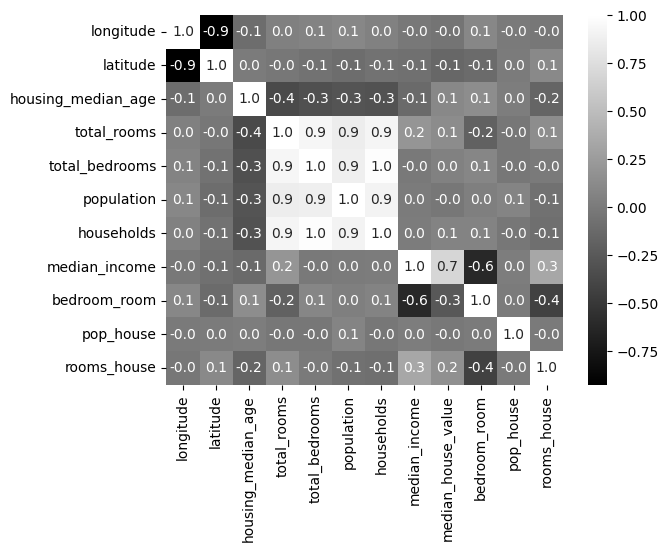

In [21]:
X_corr = X_corr.corr()
X_corr.median_house_value.sort_values(ascending = False)
X_train.info()
X_corr = X_corr.drop("median_house_value")
sns.heatmap(X_corr,annot=True,cmap='gray',fmt='.1f')

In [22]:
X_train = X_train.drop(["total_rooms", "population", "total_bedrooms"], axis = 1)
X_test = X_test.drop(["total_rooms", "population", "total_bedrooms"], axis = 1)
print(X_train.info())
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 14196 to 15795
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   households          16512 non-null  float64
 4   median_income       16512 non-null  float64
 5   median_house_value  16512 non-null  float64
 6   bedroom_room        16512 non-null  float64
 7   pop_house           16512 non-null  float64
 8   rooms_house         16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 4128 entries, 20046 to 3665
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           4128 non-null   fl

In [23]:
# X_sns_pair = X_train.sample(500)
# sns.pairplot(X_sns_pair, hue = "median_house_value")

In [24]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
ocean_cat = X_train.ocean_proximity
X_train = X_train.drop("ocean_proximity", axis = 1)
X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled, columns = X_train.columns, index = X_train.index)
X_train = pd.concat([X_train, ocean_cat], axis = 1)
# Scaling X_test
ocean_cat_test = X_test.ocean_proximity
X_test = X_test.drop("ocean_proximity", axis = 1)
X_test_scaled = scaler.transform(X_test)
X_test= pd.DataFrame(X_test_scaled, columns = X_test.columns, index = X_test.index)
X_test = pd.concat([X_test, ocean_cat_test], axis = 1)

In [25]:
column_ocean = X_train.ocean_proximity.unique()

In [26]:
# OneHotEncoding of Categorical Features
from sklearn.preprocessing import OneHotEncoder
X_ocean = X_train[["ocean_proximity"]]
encoder = OneHotEncoder()
X_ocean_1hot = encoder.fit_transform(X_ocean)
X_ocean_1hot = X_ocean_1hot.toarray()
X_ocean_1hot_df = pd.DataFrame(X_ocean_1hot, columns = column_ocean, index = X_train.index)
X_train = pd.concat([X_train, X_ocean_1hot_df], axis = 1 )
X_train.drop("ocean_proximity",inplace = True, axis = 1)

In [27]:
X_train.head(10)

,longitude,latitude,housing_median_age,households,median_income,median_house_value,bedroom_room,pop_house,rooms_house,NEAR OCEAN,INLAND,<1H OCEAN,NEAR BAY,ISLAND
14196,1.272587,-1.372811,0.348490,0.322906,-0.326196,-0.901189,-0.211785,0.051376,-0.174916,0.0,0.0,0.0,0.0,1.0
8267,0.709162,-0.876696,1.618118,0.672027,-0.035843,1.512771,0.342185,-0.117362,-0.402835,0.0,0.0,0.0,0.0,1.0
17445,-0.447603,-0.460146,-1.952710,-0.430461,0.144701,-0.299213,-0.661658,-0.032280,0.088216,0.0,0.0,0.0,0.0,1.0
14265,1.232698,-1.382172,0.586545,-0.380587,-1.017864,-0.984220,0.783032,0.077507,-0.600015,0.0,0.0,0.0,0.0,1.0
2271,-0.108551,0.532084,1.142008,-0.314962,-0.171488,-0.957408,-0.550364,-0.068832,0.349007,0.0,1.0,0.0,0.0,0.0
17848,-1.135679,0.831625,-0.683082,0.790151,1.439919,0.498233,-0.901575,0.023111,0.354757,1.0,0.0,0.0,0.0,0.0
6252,0.803897,-0.750327,-0.048268,-0.293963,-0.715013,-0.431544,0.594427,0.034142,-0.456530,1.0,0.0,0.0,0.0,0.0
9389,-1.469745,1.060961,0.665897,-0.217838,2.157529,2.532508,-0.951342,-0.060568,0.258670,0.0,0.0,0.0,1.0,0.0
6113,0.838800,-0.708204,-1.873359,-0.496085,-1.250241,-0.582903,1.168774,-0.040033,-0.760128,1.0,0.0,0.0,0.0,0.0
6061,0.893646,-0.759688,-1.873359,5.977096,1.336938,0.937607,-1.029905,0.025712,0.542474,1.0,0.0,0.0,0.0,0.0


In [28]:
# Applying same transform OneHotEncoding on X_test
X_test_ocean = X_test[["ocean_proximity"]]
X_test_1hot = encoder.transform(X_test_ocean)
X_test_1hot = X_test_1hot.toarray()
X_test_1hot_df = pd.DataFrame(X_test_1hot, columns = column_ocean, index = X_test.index)
X_test = pd.concat([X_test, X_test_1hot_df], axis = 1 )
X_test.drop("ocean_proximity",inplace = True, axis = 1)

In [29]:
X_test.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
households            0
median_income         0
median_house_value    0
bedroom_room          0
pop_house             0
rooms_house           0
NEAR OCEAN            0
INLAND                0
<1H OCEAN             0
NEAR BAY              0
ISLAND                0
dtype: int64

In [30]:
y_train = X_train.median_house_value
y_test = X_test.median_house_value
X_train = X_train.drop("median_house_value", axis = 1)
X_test = X_test.drop("median_house_value", axis = 1)

In [31]:
X_train.info()
print("#")
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 14196 to 15795
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   households          16512 non-null  float64
 4   median_income       16512 non-null  float64
 5   bedroom_room        16512 non-null  float64
 6   pop_house           16512 non-null  float64
 7   rooms_house         16512 non-null  float64
 8   NEAR OCEAN          16512 non-null  float64
 9   INLAND              16512 non-null  float64
 10  <1H OCEAN           16512 non-null  float64
 11  NEAR BAY            16512 non-null  float64
 12  ISLAND              16512 non-null  float64
dtypes: float64(13)
memory usage: 1.8 MB
#
<class 'pandas.core.series.Series'>
Index: 16512 entries, 14196 to 15795
Series name: median_house_value
Non-Null 

In [32]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state = 42)

In [33]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)
X_val.columns = X_val.columns.astype(str)

In [34]:
X_train.info()
print("#")
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14860 entries, 493 to 8472
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14860 non-null  float64
 1   latitude            14860 non-null  float64
 2   housing_median_age  14860 non-null  float64
 3   households          14860 non-null  float64
 4   median_income       14860 non-null  float64
 5   bedroom_room        14860 non-null  float64
 6   pop_house           14860 non-null  float64
 7   rooms_house         14860 non-null  float64
 8   NEAR OCEAN          14860 non-null  float64
 9   INLAND              14860 non-null  float64
 10  <1H OCEAN           14860 non-null  float64
 11  NEAR BAY            14860 non-null  float64
 12  ISLAND              14860 non-null  float64
dtypes: float64(13)
memory usage: 1.6 MB
#
<class 'pandas.core.series.Series'>
Index: 14860 entries, 493 to 8472
Series name: median_house_value
Non-Null Count 

In [35]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [36]:
y_predict = lin_reg.predict(X_val)
# metrics
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_val, y_predict)
rmse = np.sqrt(lin_mse)
print(rmse)

0.6296600765411112


In [37]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [38]:
y_predict_tree = tree_reg.predict(X_val)

tree_mse =  mean_squared_error(y_val, y_predict_tree)
rmse = np.sqrt(tree_mse)
print(rmse)

0.6239044172578341


In [39]:
from sklearn.metrics import r2_score
r2 = r2_score(y_val, y_predict_tree)
print(r2)

0.6278167054536037


In [40]:
# MAPE-> Mean Absolute prediction error
def mape(y, y_pred):
    return np.mean(np.abs((y - y_pred)/y))
mape_score = mape(y_val, y_predict_tree)
print(mape_score)

15.028295819370005


In [41]:
mape_score = mape(y_val, y_predict)
print(mape_score)

12.789714708485473


In [42]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, X_train,y_train, scoring = "neg_mean_squared_error", cv = 10 )
tree_rmse_cv = np.sqrt(-scores)

In [43]:
tree_rmse_cv.std()

0.028637881886073684

In [44]:
lin_scores = cross_val_score(lin_reg, X_train,y_train, scoring = "neg_mean_squared_error", cv = 10 )
lin_rmse_cv = np.sqrt(-scores)
lin_rmse_cv.std()

0.028637881886073684

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
param_grid = [
    {"n_estimators": [10, 30, 50, 100], "max_features":[10, 14, 20, 25]},
    {"bootstrap" : [False], "n_estimators": [3, 10], "max_features":[2,10, 14]}
]
forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv = 5, scoring = 'neg_mean_squared_error', return_train_score = True)

grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [10, 14, 20, 25],
                          'n_estimators': [10, 30, 50, 100]},
                         {'bootstrap': [False], 'max_features': [2, 10, 14],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [53]:
grid_search.best_params_
best_model = grid_search.best_estimator_
print(best_model)


RandomForestRegressor(max_features=10)


In [55]:
forest_random = RandomForestRegressor(max_features  = 10, n_estimators = 100)
forest_random.fit(X_train, y_train)

RandomForestRegressor(max_features=10)

In [57]:
y_predict_final = forest_random.predict(X_test)
mape_score = mape(y_test, y_predict_final)
mape_score

1.129485615605195